##  <center> AUTOENCODERS EN MNIST <br><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="20%" height="15%" /><br>Andrea Carolina Reales Villalba -- Jesus Eduardo Ortiz Sandoval <BR>Punto 2 </center>

Como se ha discutido en clases, las RBM’s y posteriormente los AE’s (redes no supervisadas) fueron un componente crucial en el desarrollo de los modelos que entre 2006 y 2010 vigorizaron el área de las redes neuronales artificiales con logros notables de desempeño en diferentes tareas de aprendizaje automático. En esta sección aprenderemos a utilizar el más sencillo de estos modelos: un autoencoder o AE. Consideraremos tres aplicaciones clásicas: reducción de dimensionalidad, *denoising* y pre-entrenamiento. Con este objetivo en mente, utilizaremos un dataset denominado MNIST[[3]](#refs). Se trata de una colección de 70000 imágenes de 28 $\times$ 28 pixeles correspondientes a dígitos manuscritos (números entre 0 y 9). En su versión tradicional, la colección se encuentra separada en dos subconjuntos: uno de entrenamiento de 60000 imágenes y otro de test de 10000 imágenes. La tarea consiste en construir un programa para que aprenda a identificar correctamente el dı́gito representado en la imagen

a) Escriba el código que **cargue los datos** desde el repositorio de keras, normalice las imágenes de modo que los pixeles queden en [0, 1], transforme las imágenes en vectores ($\in {\rm I\!R}^{784}$) y devuelva tres subconjuntos disjuntos: uno de entrenamiento, uno de validación y uno de pruebas. Construya el conjunto de validación de la manera que estime conveniente, éste debe contar con $nval = 5000$ imágenes.

In [1]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import *
from numpy.random import binomial
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential

Using TensorFlow backend.


In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
total=len(x_test)
x_train = x_train.astype('float32') / 255.
x_test= x_test.astype('float32') / 255.
x_test1=x_test[:int(0.5*total)]                       
x_val=x_test[int(0.5*total)::]     
y_test=y_test[:int(0.5*total)]  

In [44]:
x_train.shape

(60000, 28, 28)

In [45]:
x_val.shape

(5000, 28, 28)

In [46]:
x_test1.shape

(5000, 28, 28)

Observamos las dimensiones que tenemos de los arreglos de entrada, decidimos hacer un pequeño cambio para observar si podemos tener mejores resultados que en las tareas anteriores, el conjunto de validación lo extraemos del set de test cargado en el dataset MNIST no del training, esto para tener mas muestras para entrenamiento, y que la validación se haga tambien con datos provenientes de otro set de datos, esperamos que esto mejore el rendimiento del algoritmo y tenga mejor generalización ante las muestras con las que se piensa hacer el test.

In [28]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test1 = x_test1.reshape((len(x_test1), np.prod(x_test1.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))

a) Entrene un AE básico (1 capa escondida) para generar una representación de MNIST en $d'$= 2, 8, 32, 64 dimensiones. **Justifique la elección de la función de pérdida a utilizar y del criterio de entrenamiento en general**. Determine el porcentaje de compresión obtenido y el error de reconstrucción en cada caso. **¿Mejora el resultado si elegimos una función de activación *ReLU* para el *Encoder*? ¿Podrı́a y/o corresponde utilizar ésta activación en el *Decoder*?**

In [28]:
input_dim = x_train.shape[1]
encoding_dim = 2
compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

Compression factor: 392.0


La primera muestra que vamos a tomar es con una dimensión de 2, tiene un factor de compression de 392

In [10]:
input_img = Input(shape=(784,))
encoded = Dense(2, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(2,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy',metrics=["acc"])
history1=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x2.h5')

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


Train on 60000 samples, validate on 5000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.4472 - acc: 0.7929 - val_loss: 0.3459 - val_acc: 0.7929
Epoch 2/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.3144 - acc: 0.8045 - val_loss: 0.3048 - val_acc: 0.7925
Epoch 3/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.2903 - acc: 0.8043 - val_loss: 0.2916 - val_acc: 0.7922
Epoch 4/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2810 - acc: 0.8041 - val_loss: 0.2853 - val_acc: 0.7925
Epoch 5/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.2762 - acc: 0.8043 - val_loss: 0.2818 - val_acc: 0.7922
Epoch 6/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.2733 - acc: 0.8043 - val_loss: 0.2795 - val_acc: 0.7922
Epoch 7/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.2714 - acc: 0.8041 - val_loss: 0.2779 - val_acc

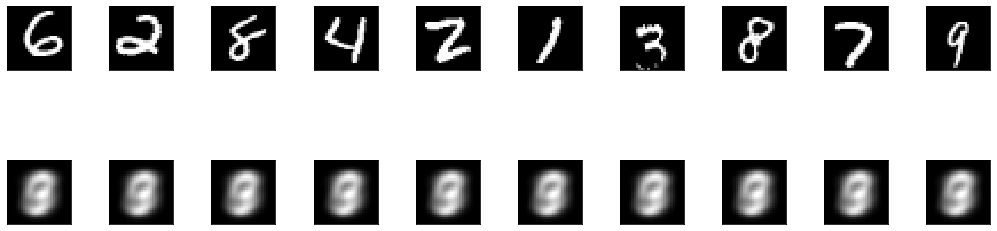

In [33]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test1.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test1)
decoded_imgs = autoencoder.predict(x_test1)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

En  los resultados vemos puros 8 debido al nivel de compresión, pero se puede decir que extrae una caracteritica muy general, pero especificamente no tiene ningun parecido.

In [34]:
input_dim = x_train.shape[1]
encoding_dim = 8
compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

Compression factor: 98.0


En el segundo caso con dimensión de 8, tenenemos un factor de compression de 98, la mitad de la dimensión anterior.

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


Train on 60000 samples, validate on 4000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.3567 - acc: 0.7945 - val_loss: 0.2928 - val_acc: 0.7910
Epoch 2/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.2770 - acc: 0.8042 - val_loss: 0.2804 - val_acc: 0.7913
Epoch 3/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.2702 - acc: 0.8043 - val_loss: 0.2769 - val_acc: 0.7910
Epoch 4/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.2677 - acc: 0.8041 - val_loss: 0.2751 - val_acc: 0.7912
Epoch 5/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.2664 - acc: 0.8042 - val_loss: 0.2742 - val_acc: 0.7910
Epoch 6/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.2656 - acc: 0.8042 - val_loss: 0.2735 - val_acc: 0.7910
Epoch 7/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.2651 - acc: 0.8042 - val_loss: 0.2731 - val_acc:

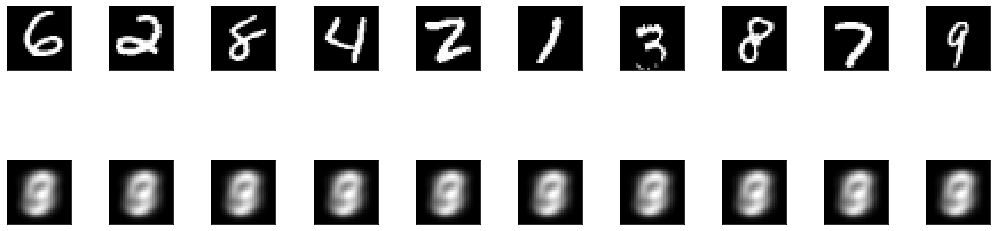

In [35]:
input_img = Input(shape=(784,))
encoded = Dense(8, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(8,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy',metrics=["acc"])
history2=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x8.h5')
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test1.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test1)
decoded_imgs = autoencoder.predict(x_test1)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Los resultados aca, son muy parecidos al primer caso, sigue viendose como un 8 siempre, pero se alcanza a ver diferencias muy muy pequeñas.

In [36]:
input_dim = x_train.shape[1]
encoding_dim = 32
compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

Compression factor: 24.5


C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


Train on 60000 samples, validate on 4000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.3014 - acc: 0.7980 - val_loss: 0.2756 - val_acc: 0.7906
Epoch 2/50
60000/60000 [==============================] - 7s 111us/step - loss: 0.2660 - acc: 0.8038 - val_loss: 0.2731 - val_acc: 0.7906
Epoch 3/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.2645 - acc: 0.8038 - val_loss: 0.2724 - val_acc: 0.7904
Epoch 4/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.2640 - acc: 0.8038 - val_loss: 0.2719 - val_acc: 0.7897
Epoch 5/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.2637 - acc: 0.8039 - val_loss: 0.2718 - val_acc: 0.7907
Epoch 6/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.2635 - acc: 0.8039 - val_loss: 0.2714 - val_acc: 0.7898
Epoch 7/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.2633 - acc: 0.8038 - val_loss: 0.2713 - v

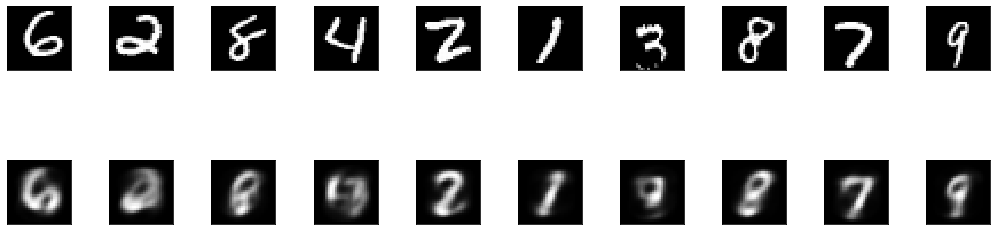

In [37]:
input_img = Input(shape=(784,))
encoded = Dense(32, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy',metrics=["acc"])
history3=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x8.h5')
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test1.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test1)
decoded_imgs = autoencoder.predict(x_test1)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [50]:
input_dim = x_train.shape[1]
encoding_dim = 64
compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

Compression factor: 12.25


C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


Train on 60000 samples, validate on 5000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.2878 - acc: 0.7995 - val_loss: 0.2722 - val_acc: 0.7907
Epoch 2/50
60000/60000 [==============================] - 8s 140us/step - loss: 0.2642 - acc: 0.8033 - val_loss: 0.2700 - val_acc: 0.7928
Epoch 3/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.2599 - acc: 0.8041 - val_loss: 0.2629 - val_acc: 0.7927
Epoch 4/50
60000/60000 [==============================] - 8s 134us/step - loss: 0.2520 - acc: 0.8036 - val_loss: 0.2545 - val_acc: 0.7920
Epoch 5/50
60000/60000 [==============================] - 8s 132us/step - loss: 0.2441 - acc: 0.8026 - val_loss: 0.2457 - val_acc: 0.7920
Epoch 6/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.2357 - acc: 0.8025 - val_loss: 0.2364 - val_acc: 0.7927
Epoch 7/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.2272 - acc: 0.8026 - val_loss: 0.2275 - v

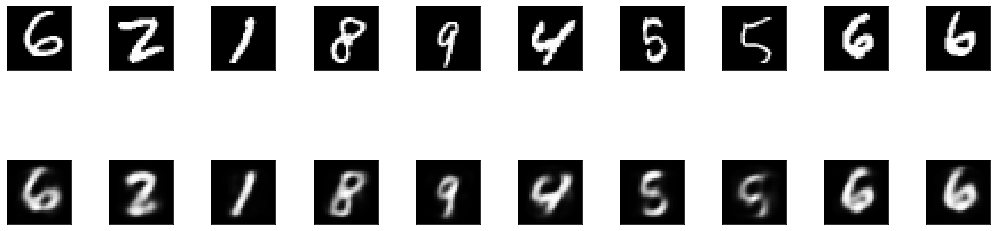

In [51]:
input_img = Input(shape=(784,))
encoded = Dense(64, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy',metrics=["acc"])
history4=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x8.h5')
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test1.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test1)
decoded_imgs = autoencoder.predict(x_test1)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


Train on 60000 samples, validate on 5000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 135us/step - loss: 0.3009 - acc: 0.7984 - val_loss: 0.2747 - val_acc: 0.7917
Epoch 2/50
60000/60000 [==============================] - 7s 121us/step - loss: 0.2660 - acc: 0.8038 - val_loss: 0.2721 - val_acc: 0.7915
Epoch 3/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.2645 - acc: 0.8038 - val_loss: 0.2715 - val_acc: 0.7915
Epoch 4/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.2640 - acc: 0.8037 - val_loss: 0.2709 - val_acc: 0.7929
Epoch 5/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.2633 - acc: 0.8039 - val_loss: 0.2697 - val_acc: 0.7922
Epoch 6/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.2616 - acc: 0.8041 - val_loss: 0.2677 - val_acc: 0.7926
Epoch 7/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.2598 - acc: 0.8043 - val_loss: 0.2660 - v

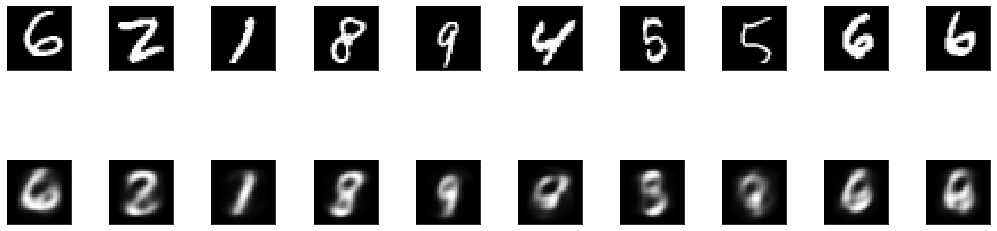

In [53]:
input_img = Input(shape=(784,))
encoded = Dense(32, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy',metrics=["acc"])
history5=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x32.h5')
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test1.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test1)
decoded_imgs = autoencoder.predict(x_test1)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

En este caso vamos a hacer la prueba de implementar ReLU en el codificador, solo con la dimensión de 32. 

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


Train on 60000 samples, validate on 5000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 136us/step - loss: 0.2319 - acc: 0.7926 - val_loss: 0.1766 - val_acc: 0.7938
Epoch 2/50
60000/60000 [==============================] - 8s 126us/step - loss: 0.1606 - acc: 0.8054 - val_loss: 0.1447 - val_acc: 0.7989
Epoch 3/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.1365 - acc: 0.8093 - val_loss: 0.1257 - val_acc: 0.8007
Epoch 4/50
60000/60000 [==============================] - 8s 129us/step - loss: 0.1217 - acc: 0.8115 - val_loss: 0.1136 - val_acc: 0.8020
Epoch 5/50
60000/60000 [==============================] - 8s 127us/step - loss: 0.1125 - acc: 0.8126 - val_loss: 0.1064 - val_acc: 0.8025
Epoch 6/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.1071 - acc: 0.8131 - val_loss: 0.1023 - val_acc: 0.8028
Epoch 7/50
60000/60000 [==============================] - 8s 135us/step - loss: 0.1038 - acc: 0.8134 - val_loss: 0.0997 - v

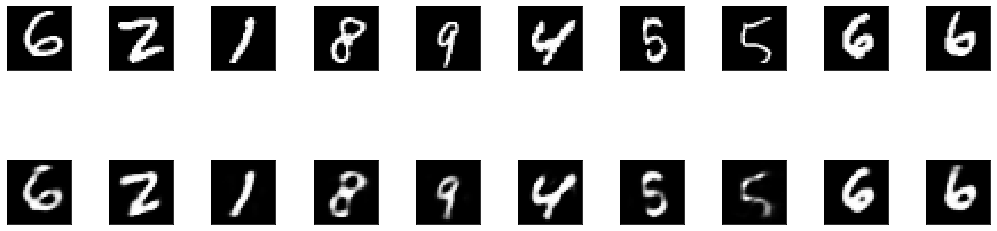

In [29]:
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy',metrics=["acc"])
history6=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x32.h5')
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test1.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test1)
decoded_imgs = autoencoder.predict(x_test1)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

En este caso antes de analizar las graficas, viendo las imagenes generadas por el autoencoder con y sin ReLU, el mejor resultado de lejos es el en el que implementamos función de activación ReLU, vamos a hacer una prueba interesante que es tomar el de dimensión 8, que no lograba representar bien la salida y observar como se comporta en este caso especifico.

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


Train on 60000 samples, validate on 5000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 107us/step - loss: 0.2482 - acc: 0.7884 - val_loss: 0.2007 - val_acc: 0.7879
Epoch 2/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.1921 - acc: 0.7975 - val_loss: 0.1840 - val_acc: 0.7912
Epoch 3/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.1814 - acc: 0.7995 - val_loss: 0.1770 - val_acc: 0.7907
Epoch 4/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.1770 - acc: 0.8005 - val_loss: 0.1739 - val_acc: 0.7908
Epoch 5/50
60000/60000 [==============================] - 5s 92us/step - loss: 0.1747 - acc: 0.8012 - val_loss: 0.1723 - val_acc: 0.7916
Epoch 6/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.1735 - acc: 0.8015 - val_loss: 0.1715 - val_acc: 0.7912
Epoch 7/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.1728 - acc: 0.8017 - val_loss: 0.1706 - val_acc

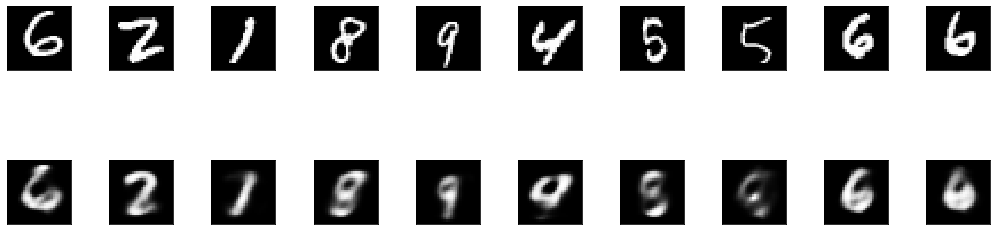

In [67]:
input_img = Input(shape=(784,))
encoded = Dense(8, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(8,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy',metrics=["acc"])
history7=autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x8_relu.h5')
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test1.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test1)
decoded_imgs = autoencoder.predict(x_test1)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Aca comparando los resultados son demasiado evidentes, cuando visualizabamos el modelo con la compresion 8 veiamos todo muy parecido aunque con unas pocas caracteristicas, en este modelo aunque igualmente se logra ver un efecto difuminado si se pueden diferenciar algunas clases.

Text(0.5, 0, 'Epochs')

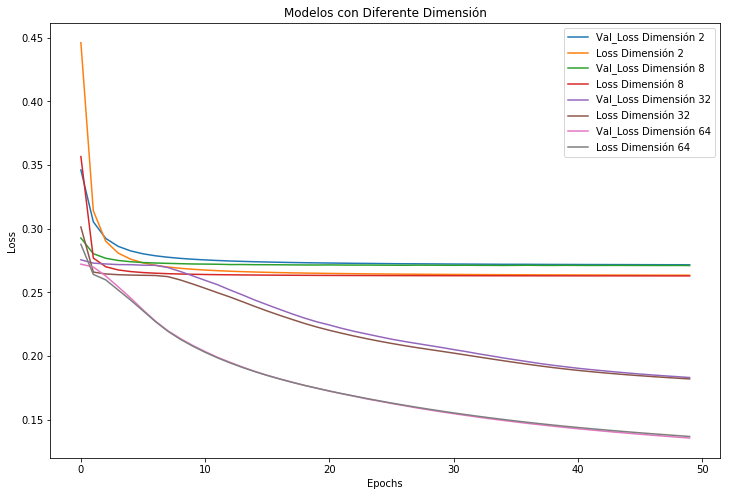

In [63]:
plt.figure(1,figsize=(12,8))
plt.plot(history1.history['val_loss'])
plt.plot(history1.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history3.history['loss'])
plt.plot(history4.history['val_loss'])
plt.plot(history4.history['loss'])
plt.legend(('Val_Loss Dimensión 2', 'Loss Dimensión 2','Val_Loss Dimensión 8', 'Loss Dimensión 8','Val_Loss Dimensión 32', 'Loss Dimensión 32','Val_Loss Dimensión 64', 'Loss Dimensión 64' ))
plt.title('Modelos con Diferente Dimensión')
plt.ylabel('Loss')
plt.xlabel('Epochs')

En esta grafica vamos a realizar la comparación de la grafica de perdida con respecto a la dimensión de los modelos entrenados, al ser un task de clasificación, podiamos observar que cuando aumentaba los niveles de comprensión obviamente la función de costo iba a ser muy alta pues no lograba diferenciar las clases pero en nuestro caso si lo que queremos analizar es la forma de como se comprime la información conservando algunas de las caracteristicas bases podemos ver la relación de compresión con tener una función de costo elevada

Text(0.5, 0, 'Epochs')

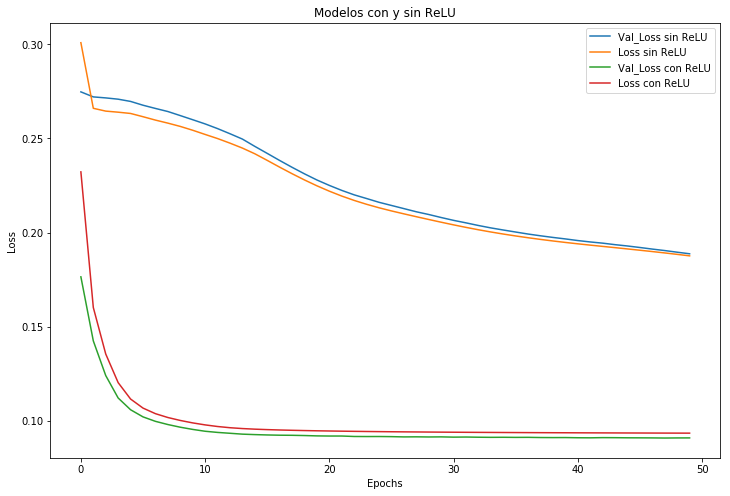

In [61]:
plt.figure(1,figsize=(12,8))
plt.plot(history5.history['val_loss'])
plt.plot(history5.history['loss'])
plt.plot(history6.history['val_loss'])
plt.plot(history6.history['loss'])
plt.legend(('Val_Loss sin ReLU','Loss sin ReLU','Val_Loss con ReLU','Loss con ReLU' ))
plt.title('Modelos con y sin ReLU')
plt.ylabel('Loss')
plt.xlabel('Epochs')

En el siguiente ejemplo vemos el comportamiento del encoder utilizando función de activación ReLU como no linealidad de la red, en este caso y como comrpobamos en la parte experimental las redes con este tipo de función mejoraban muchisimo su rendimiento ya que nos permitian hacer la compresión de la misma cantidad de la infroamción pero ya algunas caracteristicas que incluso hacian que en algunos casos las imagenes fuera imposible identificar.

Text(0.5, 0, 'Epochs')

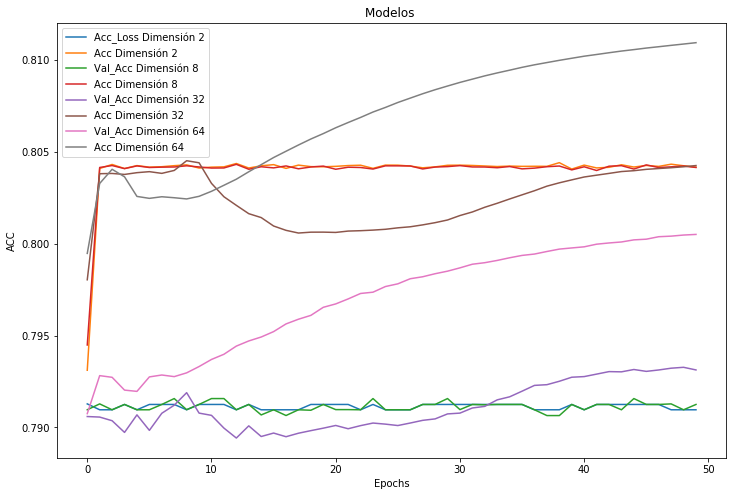

In [66]:
plt.figure(1,figsize=(12,8))
plt.plot(history1.history['val_acc'])
plt.plot(history1.history['acc'])
plt.plot(history2.history['val_acc'])
plt.plot(history2.history['acc'])
plt.plot(history3.history['val_acc'])
plt.plot(history3.history['acc'])
plt.plot(history4.history['val_acc'])
plt.plot(history4.history['acc'])
plt.legend(('Acc_Loss Dimensión 2', 'Acc Dimensión 2','Val_Acc Dimensión 8', 'Acc Dimensión 8','Val_Acc Dimensión 32', 'Acc Dimensión 32','Val_Acc Dimensión 64', 'Acc Dimensión 64', ))
plt.title('Modelos ')
plt.ylabel('ACC')
plt.xlabel('Epochs')

Tambien quisimos analizar el comportamiento del accuracy en los difernetes modelos, y como se comportaban en el transcurso del tiempo, algunas señales muestran estabilidad en el tiempo.

Text(0.5, 0, 'Epochs')

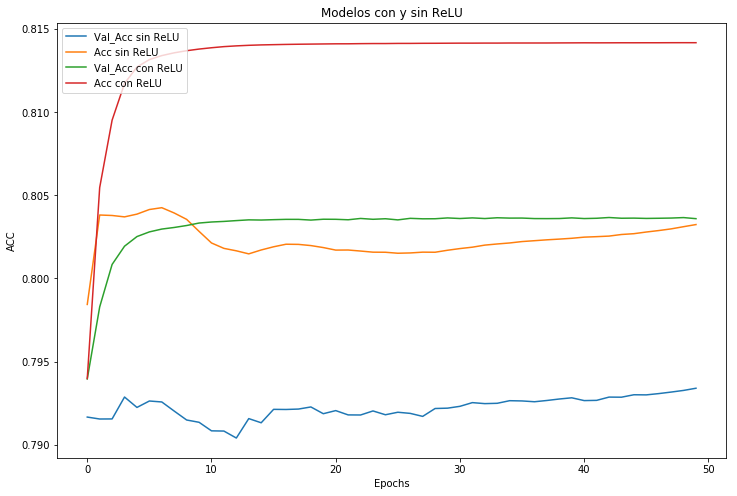

In [65]:
plt.figure(1,figsize=(12,8))
plt.plot(history5.history['val_acc'])
plt.plot(history5.history['acc'])
plt.plot(history6.history['val_acc'])
plt.plot(history6.history['acc'])
plt.legend(('Val_Acc sin ReLU','Acc sin ReLU','Val_Acc con ReLU','Acc con ReLU' ))
plt.title('Modelos con y sin ReLU')
plt.ylabel('ACC')
plt.xlabel('Epochs')

Esta grafica se realiza con la idea no tanto de ver los comportamientos de la señal que ya hemos visto en los puntos anteriores, esta nos permite ver un intervalo de Accuracy, minimo y maximo.

b) Compare visualmente la reconstrucción que logra hacer el *autoencoder* desde la representación en ${\rm I\!R}^{d'}$ para algunas imágenes del conjunto de pruebas. **Determine si la percepción visual se corresponde con el error de reconstrucción observada**. Comente.

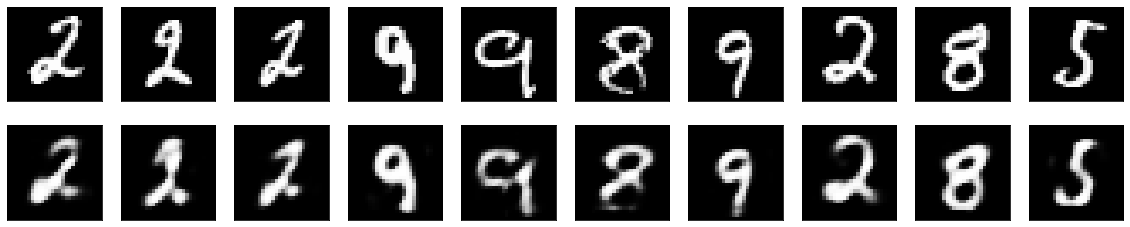

In [69]:

autoencoder = load_model('basic_autoencoder_768x32.h5')
...#load other stuff
encoded_test = encoder.predict(x_test1)
decoded_test = decoder.predict(encoded_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    j = np.random.randint(0,len(x_test1))
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[j].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_test[j].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

En este caso usamos el autoencoder con una dimensión de 32 y dropout para hacer la recomposición, obviamente podemos tener mejores resultados con mayores dimensiones pero este da una buena relación compresión con resultado, y se puede ver graficamente su resultado.

c) Para verificar la calidad de la representación obtenida, implemente el clasificador denominado $kNN$ (k-nearest neighbor): dada una imagen $x$, el clasificador busca las k = 10 imágenes de entrenamiento más similares (de acuerdo a una distancia, e.g. euclidiana) y predice como clase, la etiqueta más popular entre las imágenes cercanas. **Mida el error de pruebas** obtenido construyendo este clasificador sobre la data reducida a través del *autoencoder* comparando con la representación reducida obtenida vía PCA (una técnica clásica de reducción de dimensionalidad) utilizando el mismo número de dimensiones $d'$= 2, 4, 8, 16, 32. Considere tanto el error de reconstrucción como el desempeño en clasificación , además de comparar los tiempos medios de predicción en ambos escenarios **¿La representación generada por el *autoencoder* logra generalizar?**

In [6]:
pca = PCA(n_components=32)
pca.fit(x_train)
pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test1)
...#AUTOENCODER
encoded_train = encoder.predict(x_train)
encoded_test = encoder.predict(x_test1)
...#CLASIFICATION
clf = KNeighborsClassifier(10)
clf.fit(pca_train, y_train)
print ('Classification Accuracy PCA %.2f' % clf.score(pca_test,y_test))
clf = KNeighborsClassifier(10)
clf.fit(encoded_train, y_train)
print ('Classification Accuracy Encoder %.2f' % clf.score(encoded_test,y_test))

Classification Accuracy PCA 0.96
Classification Accuracy Encoder 0.95


Al igual que en el punto anterior vamos a validar el modelo de 32 dimensiones con Dropout, en este caso la diferencia es muy poca debido a que se estan utilizando en el  PCA las principales 32 componentes.

d) Modifique el *autoencoder* básico construido en (a) para implementar un deep autoencoder (*deep AE*), es decir, un autoencoder con al menos dos capas ocultas. **Demuestre experimentalmente** que este *autoencoder* puede mejorar la compresión obtenida por PCA utilizando el mismo número de dimensiones $d'$ . Experimente con $d'$ =2, 4, 8, 16 y distintas profundidades ($L \in [2,4]$). Considere en esta comparación tanto el error de reconstrucción como el desempeño en clasificación (vı́a kNN) de cada representación. Comente.

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if sys.path[0] == '':


Train on 60000 samples, validate on 5000 samples
Epoch 1/40
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1788 - val_loss: 0.1210
Epoch 2/40
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1112 - val_loss: 0.0973
Epoch 3/40
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0971 - val_loss: 0.0930
Epoch 4/40
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0900 - val_loss: 0.0900
Epoch 5/40
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0857 - val_loss: 0.0825
Epoch 6/40
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0830 - val_loss: 0.0797
Epoch 7/40
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0810 - val_loss: 0.0821
Epoch 8/40
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0794 - val_loss: 0.0780
Epoch 9/40
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0781 - val_loss: 0.0770
Epoch 

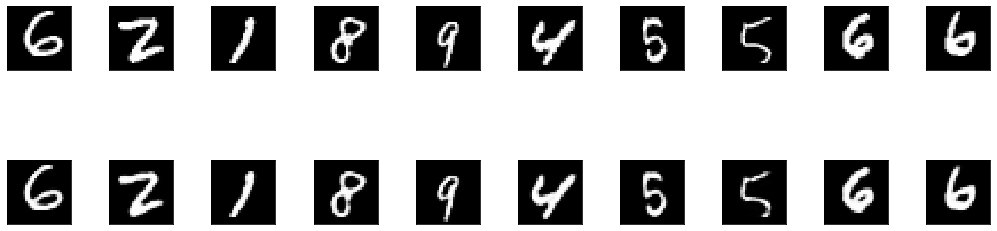

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [71]:
target_dim = 2 #try other and do a nice plot
input_img = Input(shape=(784,))
encoded1 = Dense(1000, activation='relu')(input_img)
encoded2 = Dense(500, activation='relu')(encoded1)
encoded3 = Dense(250, activation='relu')(encoded2)
encoded4 = Dense(target_dim, activation='relu')(encoded3)
decoded4 = Dense(250, activation='relu')(encoded4)
decoded3 = Dense(500, activation='relu')(encoded3)
decoded2 = Dense(1000, activation='relu')(decoded3)
decoded1 = Dense(784, activation='sigmoid')(decoded2)
autoencoder = Model(input=input_img, output=decoded1)
encoder = Model(input=input_img, output=encoded3)
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
history8=autoencoder.fit(x_train,x_train,epochs=40,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('my_autoencoder_768x1000x500x250x2.h5')
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test1.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test1)
decoded_imgs = autoencoder.predict(x_test1)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

pca = PCA(n_components=target_dim)
pca.fit(x_train)

e) Elija algunas de las representaciones aprendidas anteriormente ($d>2$) y visualı́celas usando la herramienta *TSNE* disponible en la librerı́a *sklearn*. **Compare cualitativamente el resultado con aquel obtenido usando PCA** con el mismo número de componentes ($d>2$). Finalmente **grafique una representación** generada por un autoencoder directamente ($d=2$), comente.

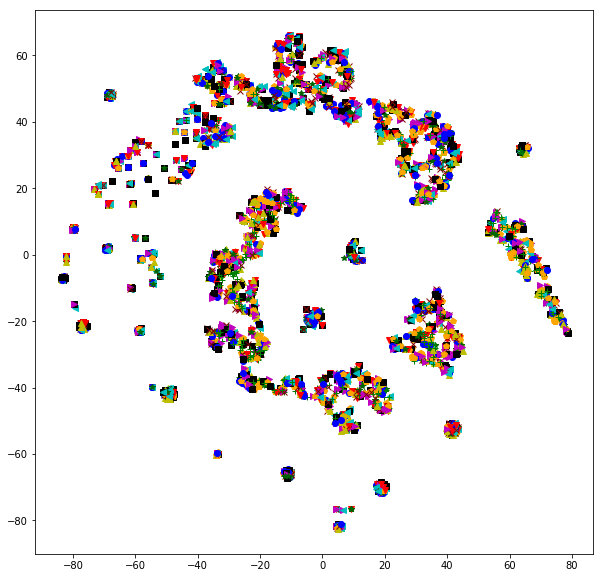

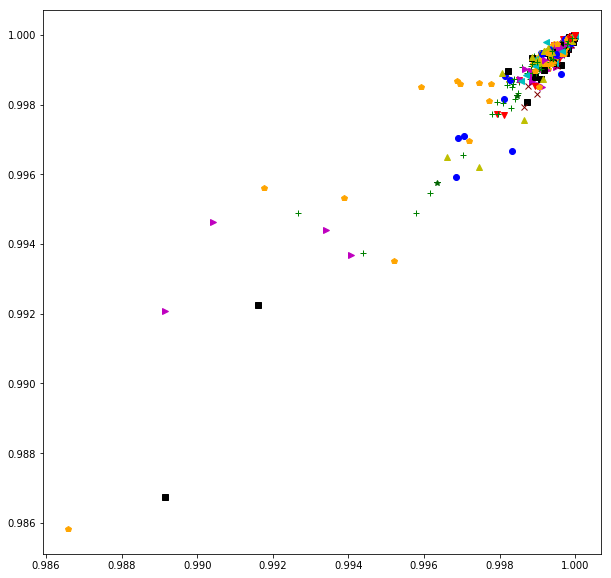

In [11]:
nplot=5000 #warning: mind your memory!
encoded_train = encoder.predict(x_train[:nplot])

model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)
pca_train = pca.transform(x_train)
encoded_train = pca_train[:nplot]
... #plot PCA
... #plot AE (d=2) without TSNE
encoded_train = encoder.predict(x_train[:nplot]) #Autoencoder with d=2
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)

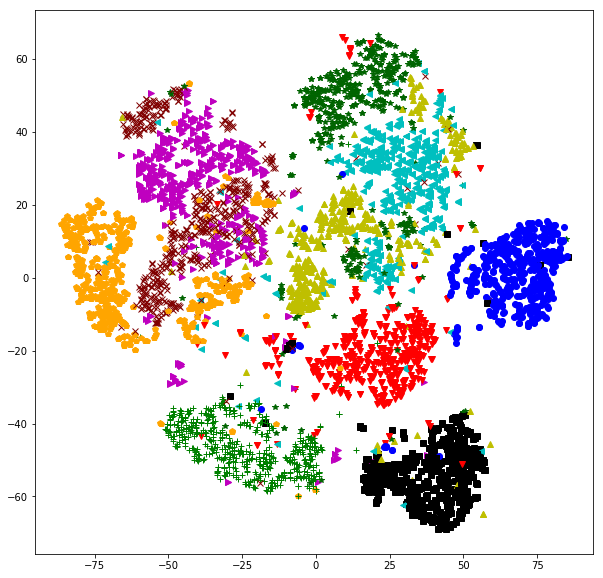

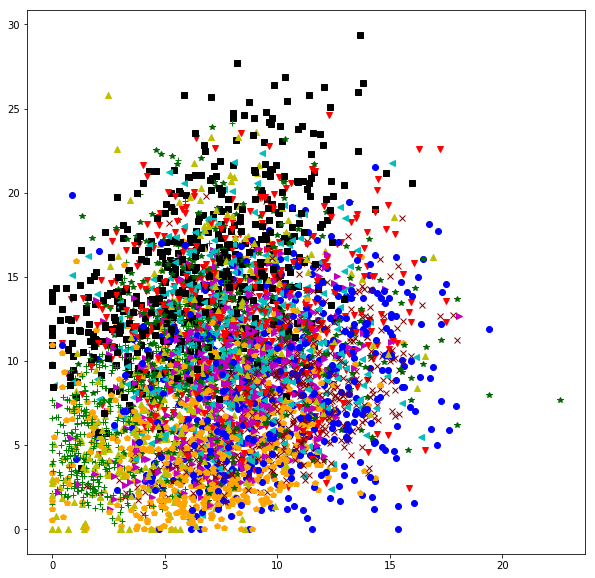

In [30]:
nplot=5000 #warning: mind your memory!
encoded_train = encoder.predict(x_train[:nplot])

model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)
pca_train = pca.transform(x_train)
encoded_train = pca_train[:nplot]
... #plot PCA
... #plot AE (d=2) without TSNE
encoded_train = encoder.predict(x_train[:nplot]) #Autoencoder with d=2
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in range(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)

En estas graficas vemos que funciona mucho mejor en analisis de componentes principales, y sobre todo, que cuando tenemos una dimension grande con poca comprensión las muestras son facilmente identificables, diferenciables y clasificables

f) Cuando el problema se torna más difícil es necesario complejizar el modelo. Modifique el autoencoder construido en (a) para trabajar directamente sobre las imágenes de MNIST, sin tratarlas como vectores de 784 atributos, sino como matrices de tamaño $1\times28\times28$. Es posible lograr este objetivo utilizando capas convolucionales para definir el *Encoder* y capas con **convoluciones transpuesta** en el *Decoder*, comente como sufre las transformaciones el patrón de entrada. Compare la calidad de la representación reducida obtenida por el nuevo autoencoder con aquella obtenida anteriormente utilizando el mismo número de dimensiones. Comente.

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
total=len(x_test)
x_train = x_train.astype('float32') / 255.
x_test= x_test.astype('float32') / 255.
x_test1=x_test[:int(0.5*total)]                       
x_val=x_test[int(0.5*total)::]     
y_test=y_test[:int(0.5*total)]  

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) #modify for th dim ordering
x_test1 = np.reshape(x_test1, (len(x_test1), 28, 28, 1))

input_img = Input(shape=(28, 28, 1))
x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=["acc"])
autoencoder.summary()
history8=autoencoder.fit(x_train,x_train,epochs=20,batch_size=32,validation_data=(x_test1,x_test1))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_transpose_19 (Conv2DT (None, 7, 7, 16)          2320      
_________________________________________________________________
up_sampling2d_13 (UpSampling (None, 14, 14, 16)        0         
__________

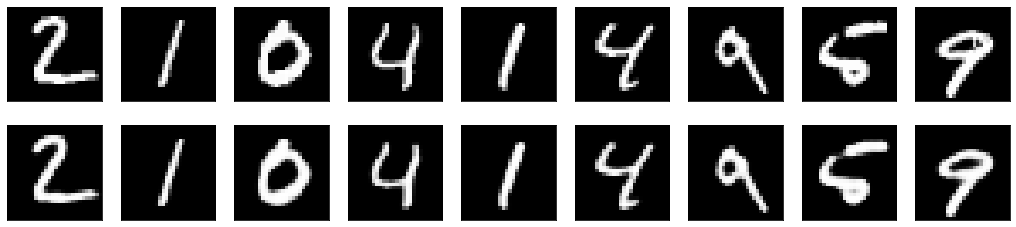

In [37]:
decoded_imgs = autoencoder.predict(x_test1)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,10):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [46]:
encoded_imgs.shape[0]

5000

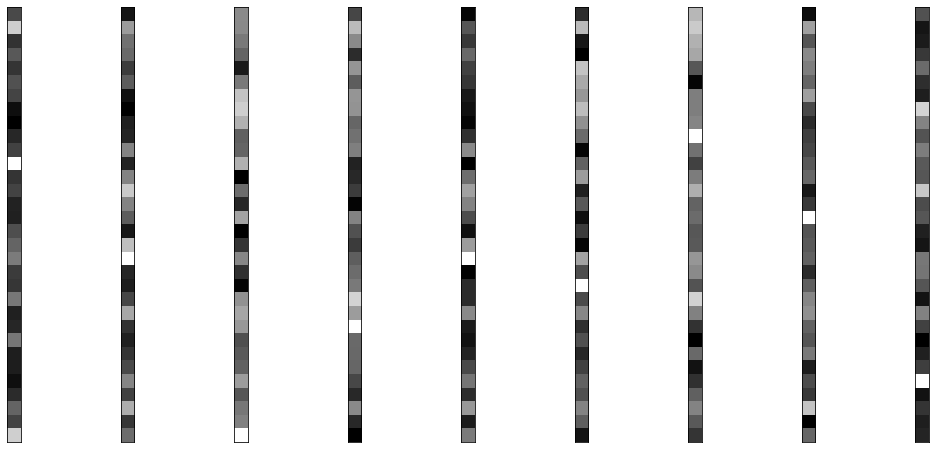

In [58]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1,10):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(1, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

En este caso vemos que la comprensión y la representación de caracteristicas es bastante impactante y los resultados son los esperados ante la complejidad del sistema.

## Denoising
Como se ha discutido en clases, un *denoising autoencoder* (dAE)[[4]](#refs) es escencialmente un autoencoder entrenado para reconstruir ejemplos parcialmente corruptos. Varios autores han demostrado que mediante esta modificación simple es posible obtener representaciones más robustas y significativas que aquellas obtenidas por un AE básico. En esta sección exploraremos la aplicación más “natural” o “directa” del método.

a) **Genere artificialmente una versión corrupta de las imágenes en MNIST** utilizando el siguiente modelo de ruido (masking noise): si $ x \in {\rm I\!R}^d $ es una de las imágenes originales, la versión ruidosa $\tilde{x}$ se obtiene como $\tilde{x} = x \odot \xi$ donde $\odot$ denota el producto de Hadamard (componente a componente) y $\xi \in {\rm I\!R}^d$ es un vector aleatorio binario con componentes *Ber(p)* independientes.

In [61]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
total=len(x_test)
x_train = x_train.astype('float32') / 255.
x_test= x_test.astype('float32') / 255.
x_test1=x_test[:int(0.5*total)]                       
x_val=x_test[int(0.5*total)::]     
y_test=y_test[:int(0.5*total)]  
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test1 = x_test1.reshape((len(x_test1), np.prod(x_test1.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
noise_level = 0.3
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train = x_train*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
noisy_x_val = x_val*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test = x_test*noise_mask

b) Entrene un autoencoder para reconstruir las imágenes corruptas generadas en el ı́tem anterior. **Mida el error de reconstrucción y evalúe cualitativamente** (visualización de la imagen corrupta y reconstruida) el resultado para un subconjunto representativo de imágenes. **Experimente diferentes valores de *p* en el rango (0, 1).**

In [62]:
input_img = Input(shape=(784,))
encoded = Dense(8, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(8,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy',metrics=["acc"])
autoencoder.fit(noisy_x_train, x_train, epochs=40, batch_size=32, validation_data=(noisy_x_val, x_val))

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


Train on 60000 samples, validate on 5000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 119us/step - loss: 0.2473 - acc: 0.7899 - val_loss: 0.1952 - val_acc: 0.7891
Epoch 2/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.1880 - acc: 0.7984 - val_loss: 0.1824 - val_acc: 0.7913
Epoch 3/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.1808 - acc: 0.7994 - val_loss: 0.1771 - val_acc: 0.7915
Epoch 4/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.1770 - acc: 0.8004 - val_loss: 0.1742 - val_acc: 0.7916
Epoch 5/50
60000/60000 [==============================] - 7s 112us/step - loss: 0.1747 - acc: 0.8011 - val_loss: 0.1722 - val_acc: 0.7916
Epoch 6/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.1734 - acc: 0.8016 - val_loss: 0.1711 - val_acc: 0.7911
Epoch 7/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.1726 - acc: 0.8019 - val_loss: 0.1708 - v

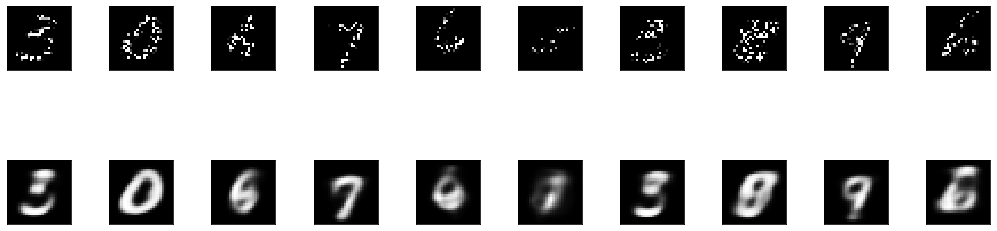

In [63]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(noisy_x_val.shape[0], size=num_images)

encoded_imgs = encoder.predict(noisy_x_val)
decoded_imgs = autoencoder.predict(noisy_x_val)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(noisy_x_val[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Aplicamos ruido y luego analizamos el comportamiento de las imágenes, aunque en algunos casos tiene fallos en gran parte de la reconstrucción funciona adecuadamente.

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 60000 samples, validate on 5000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.2828 - acc: 0.7875 - val_loss: 0.2413 - val_acc: 0.7859
Epoch 2/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.2197 - acc: 0.7954 - val_loss: 0.2060 - val_acc: 0.7875
Epoch 3/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.1990 - acc: 0.7971 - val_loss: 0.1943 - val_acc: 0.7893
Epoch 4/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.1905 - acc: 0.7987 - val_loss: 0.1872 - val_acc: 0.7905
Epoch 5/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1859 - acc: 0.7999 - val_loss: 0.1837 - val_acc: 0.7902
Epoch 6/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1840 - acc: 0.8003 - val_loss: 0.1824 - val_acc: 0.7905
Epoch 7/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1829 - acc: 0.8005 - val_loss: 0.1816 - v

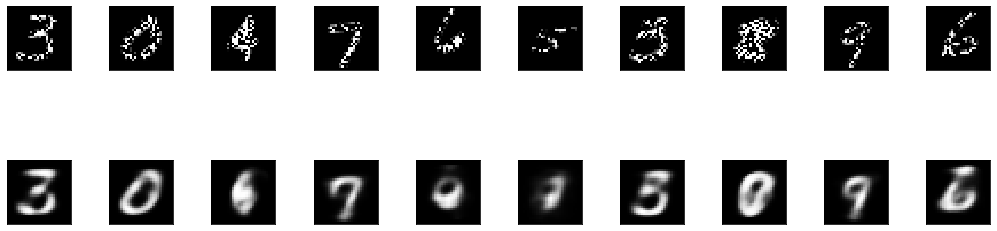

In [138]:
##P=0.5
(x_train, y_train), (x_test, y_test) = mnist.load_data()
total=len(x_test)
x_train = x_train.astype('float32') / 255.
x_test= x_test.astype('float32') / 255.
x_test1=x_test[:int(0.5*total)]                       
x_val=x_test[int(0.5*total)::]     
y_test=y_test[:int(0.5*total)]  
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test1 = x_test1.reshape((len(x_test1), np.prod(x_test1.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
noise_level = 0.5
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train = x_train*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
noisy_x_val = x_val*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test = x_test*noise_mask
input_img = Input(shape=(784,))
encoded = Dense(8, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(8,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy',metrics=["acc"])
autoencoder.fit(noisy_x_train, x_train, epochs=20, batch_size=32, validation_data=(noisy_x_val, x_val))
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(noisy_x_val.shape[0], size=num_images)

encoded_imgs = encoder.predict(noisy_x_val)
decoded_imgs = autoencoder.predict(noisy_x_val)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(noisy_x_val[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Cuando aumentamos el P, el ruido es menos pronunciado, pero de igual forma hay reconstrucción correcta e incorrecta en algunos casos.

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 60000 samples, validate on 5000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.2692 - acc: 0.7852 - val_loss: 0.2151 - val_acc: 0.7878
Epoch 2/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.2030 - acc: 0.7959 - val_loss: 0.1947 - val_acc: 0.7892
Epoch 3/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.1903 - acc: 0.7980 - val_loss: 0.1864 - val_acc: 0.7910
Epoch 4/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.1843 - acc: 0.7993 - val_loss: 0.1809 - val_acc: 0.7904
Epoch 5/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1810 - acc: 0.8000 - val_loss: 0.1784 - val_acc: 0.7910
Epoch 6/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.1791 - acc: 0.8005 - val_loss: 0.1773 - val_acc: 0.7915
Epoch 7/20
60000/60000 [==============================] - 7s 125us/step - loss: 0.1780 - acc: 0.8008 - val_loss: 0.1761 - v

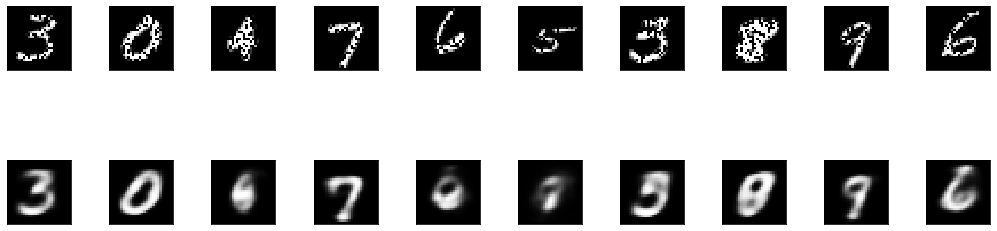

In [139]:
##P=0.7
(x_train, y_train), (x_test, y_test) = mnist.load_data()
total=len(x_test)
x_train = x_train.astype('float32') / 255.
x_test= x_test.astype('float32') / 255.
x_test1=x_test[:int(0.5*total)]                       
x_val=x_test[int(0.5*total)::]     
y_test=y_test[:int(0.5*total)]  
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test1 = x_test1.reshape((len(x_test1), np.prod(x_test1.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
noise_level = 0.7
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train = x_train*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
noisy_x_val = x_val*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test = x_test*noise_mask
input_img = Input(shape=(784,))
encoded = Dense(8, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(8,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy',metrics=["acc"])
autoencoder.fit(noisy_x_train, x_train, epochs=20, batch_size=32, validation_data=(noisy_x_val, x_val))
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(noisy_x_val.shape[0], size=num_images)

encoded_imgs = encoder.predict(noisy_x_val)
decoded_imgs = autoencoder.predict(noisy_x_val)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(noisy_x_val[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Estos casos tambien tienen la particularidad de contar con un fondo estatico negro lo que permite que de alguna forma, las caracteristicas para aprender y reconstruir la señal para que funcione como un filtro sean mas faciles de implementar en los siguientes puntos donde nos piden hacer un ruido propio queremos mover esa limitante  y poder estar completamente seguros de que esta arquitectura neuronal tambien vence esa limitante.

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 60000 samples, validate on 5000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.2569 - acc: 0.7856 - val_loss: 0.2073 - val_acc: 0.7887
Epoch 2/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.1967 - acc: 0.7968 - val_loss: 0.1876 - val_acc: 0.7908
Epoch 3/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.1849 - acc: 0.7990 - val_loss: 0.1808 - val_acc: 0.7917
Epoch 4/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.1800 - acc: 0.8000 - val_loss: 0.1760 - val_acc: 0.7911
Epoch 5/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.1771 - acc: 0.8006 - val_loss: 0.1740 - val_acc: 0.7917
Epoch 6/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1754 - acc: 0.8011 - val_loss: 0.1730 - val_acc: 0.7919
Epoch 7/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.1744 - acc: 0.8013 - val_loss: 0.1721 - v

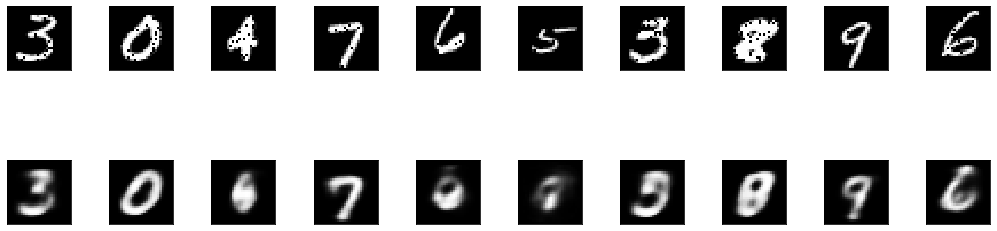

In [140]:
##P=0.9
(x_train, y_train), (x_test, y_test) = mnist.load_data()
total=len(x_test)
x_train = x_train.astype('float32') / 255.
x_test= x_test.astype('float32') / 255.
x_test1=x_test[:int(0.5*total)]                       
x_val=x_test[int(0.5*total)::]     
y_test=y_test[:int(0.5*total)]  
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test1 = x_test1.reshape((len(x_test1), np.prod(x_test1.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
noise_level = 0.9
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train = x_train*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
noisy_x_val = x_val*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test = x_test*noise_mask
input_img = Input(shape=(784,))
encoded = Dense(8, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(8,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy',metrics=["acc"])
autoencoder.fit(noisy_x_train, x_train, epochs=20, batch_size=32, validation_data=(noisy_x_val, x_val))
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(noisy_x_val.shape[0], size=num_images)

encoded_imgs = encoder.predict(noisy_x_val)
decoded_imgs = autoencoder.predict(noisy_x_val)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(noisy_x_val[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 60000 samples, validate on 5000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.3377 - acc: 0.7953 - val_loss: 0.2719 - val_acc: 0.7915
Epoch 2/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.2633 - acc: 0.8020 - val_loss: 0.2689 - val_acc: 0.7915
Epoch 3/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.2591 - acc: 0.8025 - val_loss: 0.2622 - val_acc: 0.7922
Epoch 4/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.2508 - acc: 0.8013 - val_loss: 0.2515 - val_acc: 0.7888
Epoch 5/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.2419 - acc: 0.7990 - val_loss: 0.2423 - val_acc: 0.7879
Epoch 6/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.2342 - acc: 0.7979 - val_loss: 0.2350 - val_acc: 0.7876
Epoch 7/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.2288 - acc: 0.7972 - val_loss: 0.2302 - v

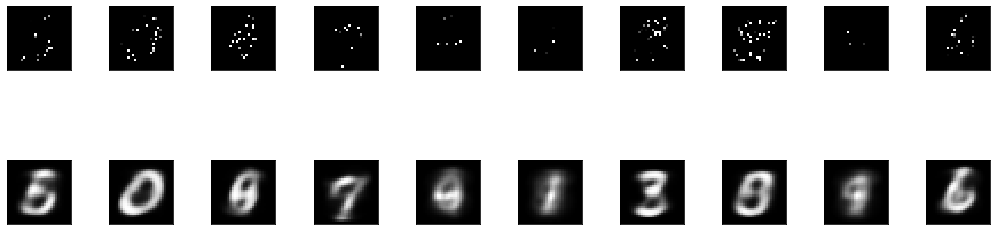

In [141]:
##P=0.1
(x_train, y_train), (x_test, y_test) = mnist.load_data()
total=len(x_test)
x_train = x_train.astype('float32') / 255.
x_test= x_test.astype('float32') / 255.
x_test1=x_test[:int(0.5*total)]                       
x_val=x_test[int(0.5*total)::]     
y_test=y_test[:int(0.5*total)]  
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test1 = x_test1.reshape((len(x_test1), np.prod(x_test1.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
noise_level = 0.1
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train = x_train*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
noisy_x_val = x_val*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test = x_test*noise_mask
input_img = Input(shape=(784,))
encoded = Dense(8, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(8,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy',metrics=["acc"])
autoencoder.fit(noisy_x_train, x_train, epochs=20, batch_size=32, validation_data=(noisy_x_val, x_val))
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(noisy_x_val.shape[0], size=num_images)

encoded_imgs = encoder.predict(noisy_x_val)
decoded_imgs = autoencoder.predict(noisy_x_val)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(noisy_x_val[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Este caso es muy interesante por que el ruido ya es bastante pronunciado, una caracteristica obviamente solo particular a aeste dataset, es que cuando hay tan pocos puntos el intenta hacer una mezcla de todas las posibles clases como lo hace con la compresión maxima para asignarle un porcentaje de aceirto a cada clase, pero tambien vemos que hay puntos en los que la metrica es muy buena y efectivamente hace el proceso de Denoising adecuadamente.

c) Utilice la representación reducida, genera por el *denoising AE*, para **medir el desempeño en clasificación** (vı́a kNN como en la sección anterior). Comente.

In [64]:
pca = PCA(n_components=32)
pca.fit(x_train)
pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test1)
...#AUTOENCODER
encoded_train = encoder.predict(x_train)
encoded_test = encoder.predict(x_test1)
...#CLASIFICATION
clf = KNeighborsClassifier(10)
clf.fit(pca_train, y_train)
print ('Classification Accuracy PCA %.2f' % clf.score(pca_test,y_test))
clf = KNeighborsClassifier(10)
clf.fit(encoded_train, y_train)
print ('Classification Accuracy Encoder %.2f' % clf.score(encoded_test,y_test))

Classification Accuracy PCA 0.96
Classification Accuracy Encoder 0.84


En este caso, vemos que el PCA tiene un porcentaje superior, pero el encoder no tiene porcentajes malos, es una metrica que nos puede permitir explorar la implementación de hiperparametros para seguir mejorando el resultado.

d) Diseñe otra manera de generar imágenes corruptas del dataset MNIST, por ejemplo algún tipo de ruido, sea creativo. **Mida el error de reconstrucción y evalúe cualitativamente** (visualización de la imagen corrupta y reconstruida) el resultado para un subconjunto representativo de imágenes


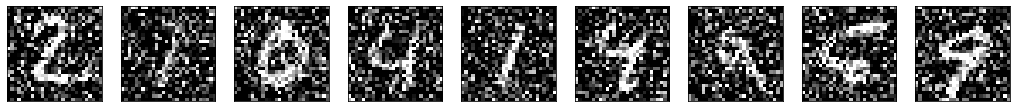

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 299s 5ms/step - loss: 0.1363 - val_loss: 0.1094
Epoch 2/5
60000/60000 [==============================] - 268s 4ms/step - loss: 0.1063 - val_loss: 0.1037
Epoch 3/5
60000/60000 [==============================] - 277s 5ms/step - loss: 0.1026 - val_loss: 0.1035
Epoch 4/5
60000/60000 [==============================] - 259s 4ms/step - loss: 0.1009 - val_loss: 0.1004
Epoch 5/5
60000/60000 [==============================] - 264s 4ms/step - loss: 0.0997 - val_loss: 0.0980


In [78]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,epochs=5,batch_size=32,shuffle=True,validation_data=(x_test_noisy, x_test))

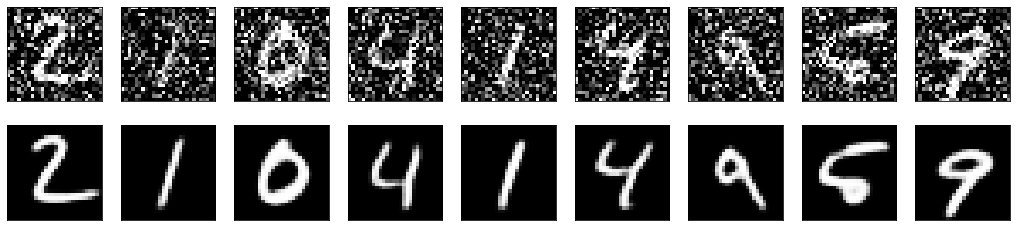

In [81]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,10):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Este ruido lo leimos en una literatura, que hace una inserción de ruido pixel a pixel, esto nos llama la atención por que en el inciso anterior hacemos un llamado a modificar el fondo fijo de color negro para ver si solo las caracteristicas blancas son las que permiten hacer la reconstrucción y eliminación del ruido,  aunque si usamos una metrica como el ojo humano son números realmente diferenciables en este caso para nuestro estudio lo que nos permite es 

### 2.3 *Similarity reconstruct*

En esta sección se explorará una forma diferente de implementar un *autoencoder* que es utilizar la arquitectura del *autoencoder* pero no para reconstruir el mismo dato, sino que para reconstruir un dato similar. En este caso la similaridad estará dada por las clases de los datos.

a) Genere pares de objetos $(objeto,similar)$ con 10 datos similares al dato "objeto", para ésto utilice la función que se provee a continuación sobre los primeros (1000 a 2000) datos de entrenamiento. **Visualice los nuevos datos generados y la relación que se produce entre los pares de objetos**.

In [83]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
total=len(x_test)
x_train = x_train.astype('float32') / 255.
x_test= x_test.astype('float32') / 255.
x_test1=x_test[:int(0.5*total)]                       
x_val=x_test[int(0.5*total)::]     
y_test=y_test[:int(0.5*total)]  
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test1 = x_test1.reshape((len(x_test1), np.prod(x_test1.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))

def similarity_data(X,Y,sim=10):
    index_classes = [ np.where(Y==number)[0] for number in range(10)]
    new_X = np.zeros((1,X.shape[1]))
    simi_X = np.zeros((1,X.shape[1]))
    for x,y in zip(X,Y):
        similarities = index_classes[y]
        sample_sim = np.random.choice(similarities,sim)
        new_X = np.concatenate((new_X, np.tile(x,(sim,1))),axis=0)
        simi_X = np.concatenate((simi_X, X[sample_sim]),axis=0)
    return new_X[1:],simi_X[1:]
data, data_sim = similarity_data(x_train[:2000],y_train[:2000])

b) Escoga algunas de las arquitecturas ya experimentadas hasta este punto de la actividad y entrénela para enfrentarla a éste problema **¿La función de pérdida se mantiene?**

C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.
C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


Train on 16000 samples, validate on 4000 samples
Epoch 1/50
16000/16000 [==============================] - 2s 155us/step - loss: 0.3149 - acc: 0.7748 - val_loss: 0.2660 - val_acc: 0.7999
Epoch 2/50
16000/16000 [==============================] - 2s 114us/step - loss: 0.2603 - acc: 0.8010 - val_loss: 0.2583 - val_acc: 0.8001
Epoch 3/50
16000/16000 [==============================] - 2s 114us/step - loss: 0.2524 - acc: 0.7985 - val_loss: 0.2504 - val_acc: 0.7937
Epoch 4/50
16000/16000 [==============================] - 2s 115us/step - loss: 0.2462 - acc: 0.7964 - val_loss: 0.2463 - val_acc: 0.7923
Epoch 5/50
16000/16000 [==============================] - 2s 114us/step - loss: 0.2432 - acc: 0.7954 - val_loss: 0.2440 - val_acc: 0.7936
Epoch 6/50
16000/16000 [==============================] - 2s 113us/step - loss: 0.2413 - acc: 0.7954 - val_loss: 0.2424 - val_acc: 0.7909
Epoch 7/50
16000/16000 [==============================] - 2s 114us/step - loss: 0.2396 - acc: 0.7954 - val_loss: 0.2407 - v

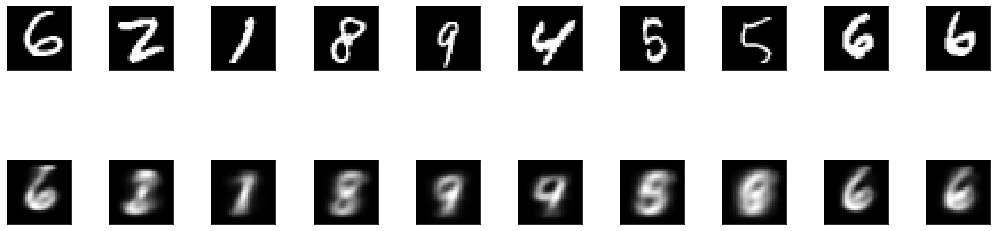

In [84]:
input_img = Input(shape=(784,))
encoded = Dense(8, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(8,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy',metrics=["acc"])
history7=autoencoder.fit(data,data_sim,epochs=50,batch_size=32,validation_split=0.2)
autoencoder.save('basic_autoencoder_768x8_relu.h5')
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test1.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test1)
decoded_imgs = autoencoder.predict(x_test1)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

En la primera fila encontramos datos originales MNIST y en la segunda fila son datos generados, hay una relación en algunos y en otros no hay conexión directa.

Text(0.5, 0, 'Epochs')

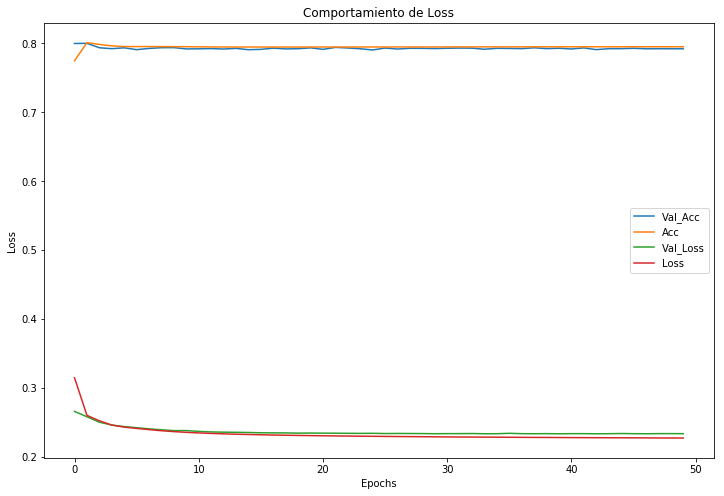

In [85]:
plt.figure(1,figsize=(12,8))
plt.plot(history7.history['val_acc'])
plt.plot(history7.history['acc'])
plt.plot(history7.history['val_loss'])
plt.plot(history7.history['loss'])
plt.legend(('Val_Acc','Acc','Val_Loss','Loss' ))
plt.title('Comportamiento de Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

c) **Visualice lo que genera el *autoencoder* dado una imagen de entrada**. Además **visualice, con la herramienta TSNE, los *embedding*/representación reducida** que se producen en el *encoder*.

In [99]:
y=autoencoder.predict(data)
embeddings = encoder.predict(data) #project this with TSNE
X=embeddings

### 2.4 Pre-*training*

En esta sección utilizaremos un AE para pre-entrenar redes profundas. Como hemos discutido en clases, el efecto esperado es regularizar el modelo, posicionando el modelo de partida en una buena zona del espacio de parámetros.

a) Construya y entrene una red FF para clasificar las imágenes de MNIST. Utilice SGD básico con tasa de aprendizaje fija $\eta = 0.01$, momentum $m=0.9$ y no más de 50 *epochs*. Para empezar, utilice una arquitectura $768 \times 1000 \times 1000 \times 10$ y **funciones de activación sigmoidales**. **Determine error de clasificación alcanzado por el modelo en el conjunto de test.**

In [122]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
total=len(x_test)
x_train = x_train.astype('float32') / 255.
x_test= x_test.astype('float32') / 255.
x_test1=x_test[:int(0.5*total)]                       
x_val=x_test[int(0.5*total)::]  
y_val=y_test[int(0.5*total)::]
y_test=y_test[:int(0.5*total)]  




x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test1 = x_test1.reshape((len(x_test1), np.prod(x_test1.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))


Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
y_val =to_categorical(y_val,10)

In [109]:
model = Sequential()
model.add(Dense(1000, activation='sigmoid', input_shape=(784,)))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()
optimizer_ = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, Y_train,nb_epoch=10, batch_size=25,shuffle=True, validation_data=(x_test1, Y_test))
model.save('ReluNet-768x1000x1000x10-NFT-50epochs.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_38 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_39 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


C:\Users\Jesus\AppData\Local\conda\conda\envs\keras1\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.7269 - acc: 0.7673 - val_loss: 0.4333 - val_acc: 0.8750
Epoch 2/10
60000/60000 [==============================] - 56s 938us/step - loss: 0.3464 - acc: 0.8974 - val_loss: 0.3633 - val_acc: 0.8948
Epoch 3/10
60000/60000 [==============================] - 56s 938us/step - loss: 0.3069 - acc: 0.9104 - val_loss: 0.3585 - val_acc: 0.8956
Epoch 4/10
60000/60000 [==============================] - 56s 939us/step - loss: 0.2787 - acc: 0.9187 - val_loss: 0.3249 - val_acc: 0.9094
Epoch 5/10
60000/60000 [==============================] - 56s 938us/step - loss: 0.2535 - acc: 0.9262 - val_loss: 0.3143 - val_acc: 0.9006
Epoch 6/10
60000/60000 [==============================] - 56s 938us/step - loss: 0.2302 - acc: 0.9320 - val_loss: 0.2801 - val_acc: 0.9108
Epoch 7/10
60000/60000 [==============================] - 56s 935us/step - loss: 0.2093 - acc: 0.9383 - val_loss: 0.255

In [125]:
error=model.evaluate(x_val,y_val,verbose=1)

5000/5000 [==============================] - 1s 241us/step


Porcentaje de clasificación en el set de pruebas

In [130]:
error[1]*100

96.46000000000001

Despues del fine tunning de los hiper parametros para este task en particular tenemos un porcentaje de clasificación alto, lejos de un overfitting ya que lo validamos sobre el set de datos de test que no ha tenido en ningun momento contacto con los datos de entrenamiento, desde el primer accuracy del punto 2.1 hasta este momento tenemos un progreso bastante sifgnificativo traslado resultados de un acc de 85 hasta un 96 por ciento.

b) Construya y entrene una red neuronal profunda para clasificar las imágenes de MNIST utilizando la arquitectura propuesta en (a) y pre-entrenando los pesos de cada capa mediante un autoencoder básico. Proceda en modo clásico, es decir, entrenando en modo no supervisado una capa a la vez y tomando como input de cada nivel la representación (entrenada) obtenida en el nivel anterior. Después del entrenamiento efectúe un entrenamiento supervisado convencional (*fine-tunning*). **Compare los resultados de clasificación sobre el conjunto de pruebas con aquellos obtenidos en (a), sin pre-entrenamiento. Evalúe también los resultados antes del *fine-tunning*.** Comente.

In [136]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
total=len(x_test)
x_train = x_train.astype('float32') / 255.
x_test= x_test.astype('float32') / 255.
x_test1=x_test[:int(0.5*total)]                       
x_val=x_test[int(0.5*total)::]  
y_val=y_test[int(0.5*total)::]
y_test=y_test[:int(0.5*total)]  




x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test1 = x_test1.reshape((len(x_test1), np.prod(x_test1.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))


Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
y_val =to_categorical(y_val,10)

In [142]:
... ## Load and preprocess MNIST as usual
...###AUTOENCODER 1
input_img1 = Input(shape=(784,))
encoded1 = Dense(100,activation=activation_layer1)(input_img1)
decoded1 = Dense(784, activation=decoder_activation_1)(encoded1)
autoencoder1 = Model(inputs=input_img1, outputs=decoded1)
encoder1 = Model(inputs=input_img1, outputs=encoded1)
autoencoder1.compile(optimizer=optimizer_, loss=loss_)
autoencoder1.fit(x_train, x_train, nb_epoch=epochs_, batch_size=batch_size_,shuffle=True, validation_data=(x_val, x_val))
encoded_input1 = Input(shape=(n_hidden_layer1,))
autoencoder1.save('autoencoder_layer1.h5')
encoder1.save('encoder_layer1.h5')
...###AUTOENCODER 2
x_train_encoded1 = encoder1.predict(x_train) #FORWARD PASS DATA THROUGH FIRST ENCODER
x_val_encoded1 = encoder1.predict(x_val)
x_test_encoded1 = encoder1.predict(x_test)
input_img2 = Input(shape=(n_hidden_layer1,))
encoded2 = Dense(n_hidden_layer2, activation=activation_layer2)(input_img2)
decoded2 = Dense(n_hidden_layer2, activation=decoder_activation_2)(encoded2)
autoencoder2 = Model(inputs=input_img2, outputs=decoded2)
encoder2 = Model(inputs=input_img2, outputs=encoded2)
autoencoder2.compile(optimizer=optimizer_, loss=loss_)
autoencoder2.fit(x_train_encoded1,x_train_encoded1,nb_epoch=epochs_,batch_size=batch_size_,shuffle=True, validation_data=(x_val_encoded1, x_val_encoded1))
encoded_input2 = Input(shape=(n_hidden_layer2,))
autoencoder2.save('autoencoder_layer2.h5')
encoder2.save('encoder_layer2.h5')
...#FINE TUNNING

model = Sequential()
model.add(Dense(n_hidden_layer1, activation=activation_layer1, input_shape=(784,)))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Dense(n_hidden_layer2, activation=activation_layer2))
model.layers[-1].set_weights(autoencoder2.layers[1].get_weights())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer=optimizer_,loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, Y_train,nb_epoch=20, batch_size=25,
shuffle=True, validation_data=(x_val, Y_val))
model.save('Net-768x1000x1000x10-finetunned.h5')

NameError: name 'activation_layer1' is not defined

En este punto, tal vez no tuvimos el tiempo suficiente para explorar el error que nos enviaba, hicimos exploración y no logramos avanzar en este inciso.

<b>Conclusiones</b>
Es importante explorar otros campos de aplicación de las redes neuronales artificiales diferentes a los mas conocidos que se encuentran en desafios de vision por computador orientados a clasificación de objetos, conteo, etc. En estas actividades hemos desarrollado pruebas y trabajos sobre otro tipo de posibles aplicaciones como el procesamiento de lenaguaje natural, y en este caso los autoencoder, para compresión y actividades de filtrado sobre imagenes.

Estas aplicaciones en conjunto con las tareas basicas de computer visión pueden crear aplicaciones muy potentes, como en algunos articulos se lee que divide y venceras, tomando aplicaciones muy complejas se pueden implementar soluciones mas sencillas de algunas particularidades y en conjunto se obtienen resultados estables en el tiempo.